<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

### Voting Regressor

This Code template is for the regression analysis using a VotingRegressor. It is an ensemble meta-estimator that fits several base regressors, each on the whole dataset. Then it averages the individual predictions to form a final prediction.

### Required Packages

In [9]:
import warnings
import numpy as np 
import pandas as pd 
import seaborn as se 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
from sklearn.linear_model import HuberRegressor,ElasticNet, ARDRegression
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
warnings.filterwarnings('ignore')

### Initialization

Filepath of CSV file

In [10]:
#filepath
file_path= ""

List of features which are  required for model training .

In [11]:
#x_values
features = []

Target feature for prediction.

In [12]:
#y_value
target=''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [13]:
df=pd.read_csv(file_path)
df.head()

,Unnamed: 0,Serial No.,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,Chance
0,0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [14]:
X=df[features]
Y=df[target]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [15]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

Calling preprocessing functions on the feature and target set.


In [16]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=NullClearner(Y)
X.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

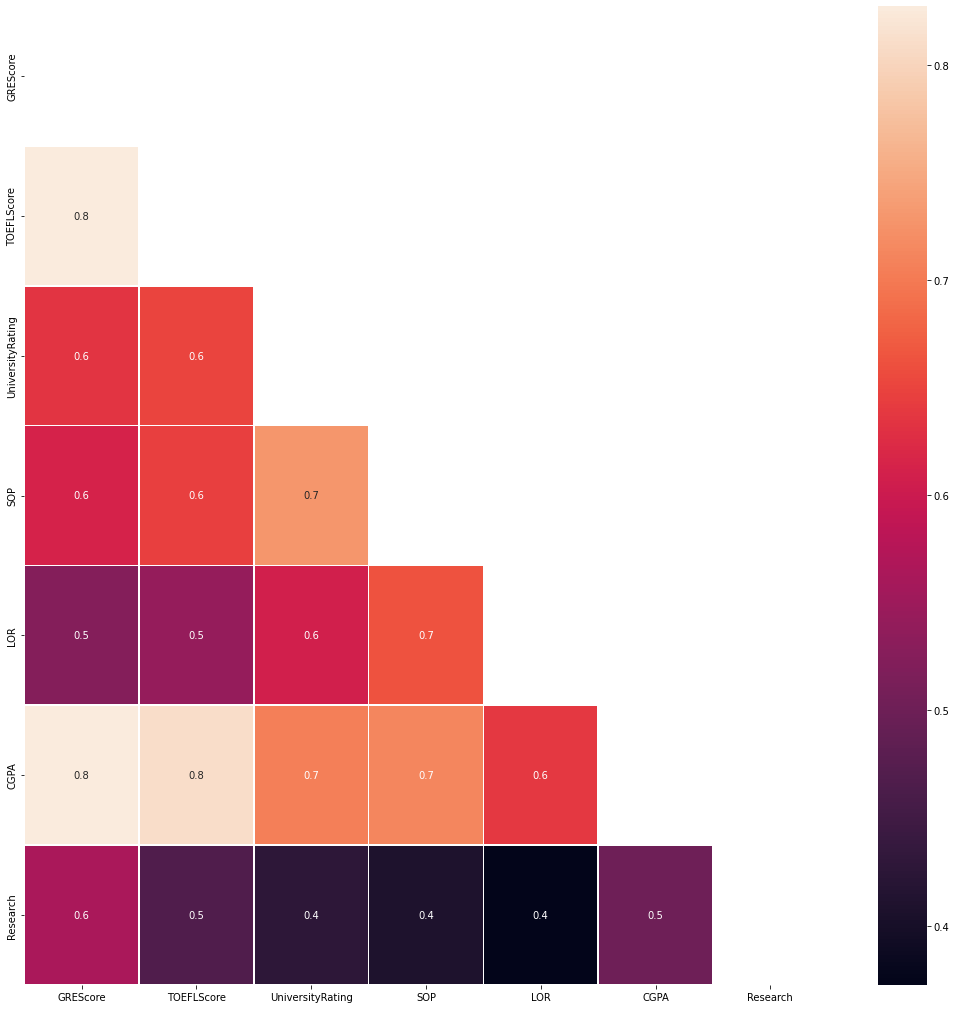

In [17]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [18]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

### Model

We use **VotingRegressor** for prediction of unfitted estimators.

A voting ensemble (or a “majority voting ensemble“) is an ensemble machine learning model that combines the predictions from multiple other models. The VotingRegressor uses a voting-averaged (VOA) method to combine an ensemble for the regression tasks. Firstly, multiple base regression models are created on the whole dataset and then passed into the VotingRegressor for ensembling which then averages the individual predictions to form a final prediction.

#### Model Tuning Parameter

> - **estimators**: list of (str, estimator) tuples
Invoking the fit method on the VotingRegressor will fit clones of those original estimators that will be stored in the class attribute self.estimators_. An estimator can be set to 'drop' using set_params.


> - **weights**: array-like of shape (n_regressors,), default=None
Sequence of weights (float or int) to weight the occurrences of predicted values before averaging. Uses uniform weights if None.

> - **n_jobs**: int, default=None
The number of jobs to run in parallel for fit. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

> - **verbose**: bool, default=False
If True, the time elapsed while fitting will be printed as it is completed.


For more details on VotingRegressor [click here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html)

In [19]:
r1 = KNeighborsRegressor(n_jobs=-1)
r2 = HuberRegressor()
r3 = ARDRegression()
r4 = ElasticNet()
model = VotingRegressor([('knr', r1), ('hr', r2), ('ard', r3), ('en', r4)])
model.fit(x_train,y_train)

VotingRegressor(estimators=[('knr', KNeighborsRegressor(n_jobs=-1)),
                            ('hr', HuberRegressor()), ('ard', ARDRegression()),
                            ('en', ElasticNet())])

#### Model Accuracy

We will use the trained model to make a prediction on the test set.Then use the predicted value for measuring the accuracy of our model.

score: The score function returns the coefficient of determination R2 of the prediction.


In [20]:
print("Accuracy score {:.2f} %\n".format(model.score(x_test,y_test)*100))

Accuracy score 75.62 %



> **r2_score**: The **r2_score** function computes the percentage variablility explained by our model, either the fraction or the count of correct predictions.  

> **mae**: The **mean abosolute error** function calculates the amount of total error(absolute average distance between the real data and the predicted data) by our model.  

> **mse**: The **mean squared error** function squares the error(penalizes the model for large errors) by our model. 

In [21]:
y_pred=model.predict(x_test)
print("R2 Score: {:.2f} %".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 75.62 %
Mean Absolute Error 0.05
Mean Squared Error 0.00


#### Prediction Plot

First, we make use of a plot to plot the actual observations, with x_train on the x-axis and y_train on the y-axis.
For the regression line, we will use x_train on the x-axis and then the predictions of the x_train observations on the y-axis.

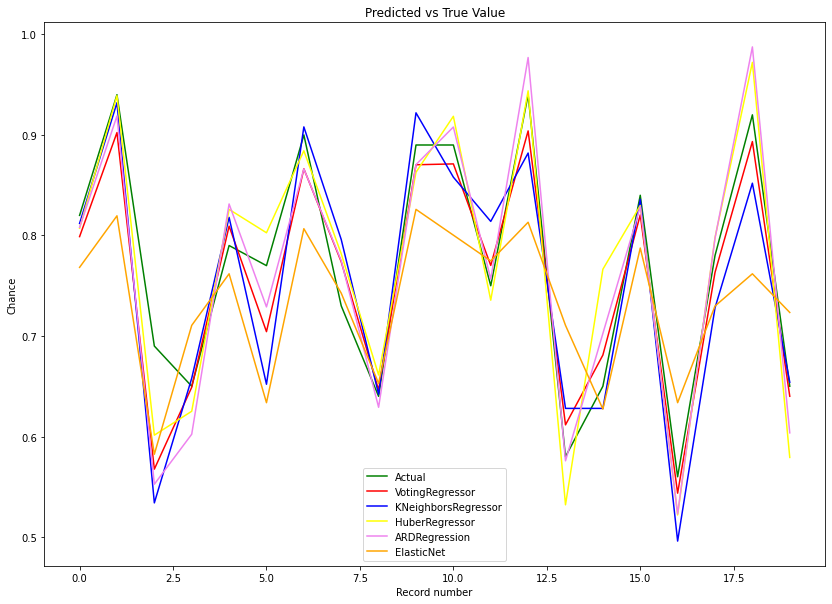

In [22]:
pred1 = r1.fit(x_train,y_train).predict(x_test)
pred2 = r2.fit(x_train,y_train).predict(x_test)
pred3 = r3.fit(x_train,y_train).predict(x_test)
pred4 = r4.fit(x_train,y_train).predict(x_test)

plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green", label = 'Actual Value')
plt.plot(range(20),y_pred[0:20], color = "red", label = "VotingRegressor")
plt.plot(range(20),pred1[0:20], color = "blue", label = "KNeighborsRegressor")
plt.plot(range(20),pred2[0:20], color = "yellow", label = "HuberRegressor")
plt.plot(range(20),pred3[0:20], color = "violet", label = "ARDRegression")
plt.plot(range(20),pred4[0:20], color = "orange", label = "ElasticNet")

plt.legend(["Actual","VotingRegressor","KNeighborsRegressor","HuberRegressor","ARDRegression","ElasticNet"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(target)
plt.show()

#### Creator: Saharsh Laud , Github: [Profile](https://github.com/SaharshLaud)